In [4]:
import pandas as pd
import seaborn as sns

In [5]:
df = pd.read_csv('../data/kaggle_bias/train.csv')

In [6]:
test = pd.read_csv('../data/kaggle_bias/test_public_expanded.csv')

Create new binary target column for modelling

In [7]:
df['binary_target'] = (df['target'] > 0.5).astype(int)
test['binary_target'] = (test['toxicity'] > 0.5).astype(int)

In [8]:
df[['id', 'comment_text', 'target', 'binary_target']]

,id,comment_text,target,binary_target
0,59848,"This is so cool. It's like, 'would you want yo...",0.000000,0
1,59849,Thank you!! This would make my life a lot less...,0.000000,0
2,59852,This is such an urgent design problem; kudos t...,0.000000,0
3,59855,Is this something I'll be able to install on m...,0.000000,0
4,59856,haha you guys are a bunch of losers.,0.893617,1
...,...,...,...,...
1804869,6333967,"Maybe the tax on ""things"" would be collected w...",0.000000,0
1804870,6333969,What do you call people who STILL think the di...,0.000000,0
1804871,6333982,"thank you ,,,right or wrong,,, i am following ...",0.000000,0
1804872,6334009,Anyone who is quoted as having the following e...,0.621212,1


Remove nulls

In [9]:
df.dropna(subset = ['comment_text'], inplace=True)

In [10]:
len(df)

1804871

In [11]:
df['binary_target'].sum()

106438

In [12]:
(df['binary_target'].sum() / len(df) ) * 100

5.897263571745571

5.96% of our data is the target class in train data

In [13]:
(test['binary_target'].sum() / len(test) ) * 100

5.804562268803946

5.80% of our data is the target class in test data

In [14]:
df = df.sample(frac=0.2, random_state=11)

In [15]:
X = df[ 'comment_text']
y = df['target']
y_bin = df['binary_target']

In [16]:
X_test = test['comment_text']
y_test = test['toxicity']
y_bin_test = test['binary_target']

In [17]:
X.isnull().sum()

0

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import string
import re

In [19]:
stop_words = stopwords.words('english')

In [20]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [50]:
def custom_tokenizer(document):
    
    #clean up
    document = document.replace('\n', '')
    document = re.sub(r'[\d_]', '', document)
    
    # remove punctuation
    for punct in string.punctuation:
        document=document.replace(punct,'')

    # tokenize - split on whitespace
    tokenized_document = document.split(' ')
    # only include word if it is NOT = ''
    tokenized_document = [word for word in tokenized_document if word != '']

    # remove stopwords before stemming
    tokenized_document = [word for word in tokenized_document if word not in stop_words]

    #stem words and return list of stemmed tokens
    stemmed_tokens_list = []
    for i in tokenized_document:
        token = PorterStemmer().stem(i)
        stemmed_tokens_list.append(token)
    return stemmed_tokens_list

    return tokenized_document

# ---------------------------------------------------------------------------------------------------------------

In [39]:
count_vectorizer = CountVectorizer(tokenizer=custom_tokenizer, min_df=10, max_features=3000, ngram_range=(1,3))

X_fit = count_vectorizer.fit(X)
X_transformed = count_vectorizer.transform(X)  

C:\Users\arman\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [97]:
X_test_transformed = count_vectorizer.transform(X_test)  

In [98]:
tokens_df = pd.DataFrame(
        data = X_transformed.todense(), 
        columns = count_vectorizer.get_feature_names_out(), index=X.index)

In [99]:
tokens_df

,1,10,10 year,100,1000,11,12,13,14,15,...,younger,your,your right,youth,youv,zero,zone,zuma,–,—
1519250,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
394286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
303890,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
845158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1500302,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734652,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
847935,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
213946,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
test_tokens_df = pd.DataFrame(
        data = X_test_transformed.todense(), 
        columns = count_vectorizer.get_feature_names_out(), index=X_test.index)

In [101]:
test_tokens_df

,1,10,10 year,100,1000,11,12,13,14,15,...,younger,your,your right,youth,youv,zero,zone,zuma,–,—
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97315,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97316,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
from sklearn.linear_model import LogisticRegression, LinearRegression
import numpy as np
import matplotlib.pyplot as plt

### Linear Regression

In [45]:
linear_model=LinearRegression()
linear_model.fit(tokens_df,y)

LinearRegression()

In [46]:
print(f"Train set accuracy {linear_model.score(X_transformed,y):.2f}%")

Train set accuracy 0.36%


C:\Users\arman\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [47]:
print(f"Test set accuracy {linear_model.score(X_test_transformed,y_test):.2f}%")

Test set accuracy 0.35%


C:\Users\arman\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [51]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [49]:
y_pred = linear_model.predict(X_test_transformed)

C:\Users\arman\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [50]:
mean_absolute_error(y_test, y_pred)

0.10997959652508191

In [52]:
mean_squared_error(y_test, y_pred)

0.024907439432313456

1st iteration, base linear regression no optimization at any step - 3000 max features, ngram(1,3), min 10:
- 36% train
- 35% test

2nd iteration, base linear regression, removed '\n' in tokenizer - 500 max features, ngram(1,3), min 10:
- 15% train
- 15% test
- mean absolute error 0.128

3rd iteration, base linear regression, removed '\n' in tokenizer - 3000 max features, ngram(1,3), min 10:
- 36% train
- 35% test
- mean absolute error 0.109
- mean square error 0.024

In [ ]:
# run log reg on binarized target and pull out top contributing tokens to modify vectorizer for linear regression

### Logistic Regression

In [30]:
logistic_model=LogisticRegression(max_iter=1000) #C=1 by default
logistic_model.fit(tokens_df,y_bin)

NameError: name 'tokens_df' is not defined

In [103]:
print(f"Train set accuracy {logistic_model.score(X_transformed,y_bin):.2f}%")

Train set accuracy 0.96%


C:\Users\arman\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [104]:
print(f"Test set accuracy {logistic_model.score(X_test_transformed,y_bin_test):.2f}%")

Test set accuracy 0.95%


C:\Users\arman\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


1st iteration, base logistic regression no optimization at any step - 3000 max features, ngram(1,3), min 10:
- 96% train
- 95% test

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score

C:\Users\arman\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


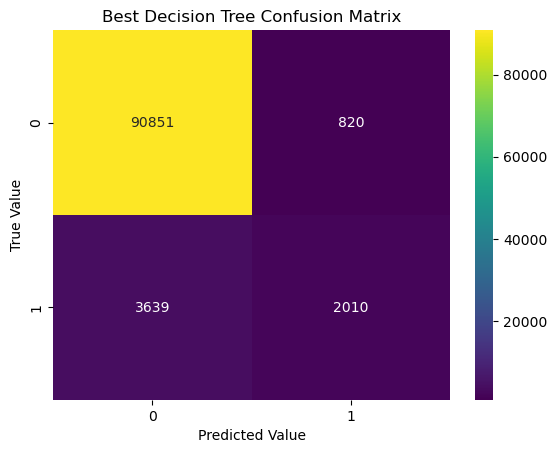

In [110]:
y_pred = logistic_model.predict(X_test_transformed)
cf_matrix = confusion_matrix(y_bin_test, y_pred)

sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='viridis')
plt.title('Best Decision Tree Confusion Matrix')
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.show()

In [111]:
print(precision_score(y_bin_test, y_pred))
print(recall_score(y_bin_test, y_pred))
print(f1_score(y_bin_test, y_pred))

0.7102473498233216
0.35581518852894317
0.474112513268074


Let's see if a tf-idf vectorizer improves our baseline results

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
tfidf = TfidfVectorizer(tokenizer=custom_tokenizer, min_df=10, max_features=3000, ngram_range=(1,3))

X_fit_tfidf = tfidf.fit(X)
X_transformed_tfidf = tfidf.transform(X)  

C:\Users\arman\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [52]:
X_test_trans_tf = tfidf.transform(X_test)  

In [53]:
tokens_tfidf_df = pd.DataFrame(
        data = X_transformed_tfidf.todense(), 
        columns = tfidf.get_feature_names_out(), index=X.index)

test_tfidf_tokens_df = pd.DataFrame(
        data = X_test_trans_tf.todense(), 
        columns = tfidf.get_feature_names_out(), index=X_test.index)

Base Log Reg

In [54]:
logistic_model=LogisticRegression(max_iter=1000)
logistic_model.fit(tokens_tfidf_df,y_bin)

LogisticRegression(max_iter=1000)

In [55]:
y_pred_tf = logistic_model.predict(X_test_trans_tf)

print(f"Train set accuracy {logistic_model.score(X_transformed_tfidf,y_bin):.2f}%")
print(f"Test set accuracy {logistic_model.score(X_test_trans_tf,y_bin_test):.2f}%")
print(precision_score(y_bin_test, y_pred_tf))
print(recall_score(y_bin_test, y_pred_tf))
print(f1_score(y_bin_test, y_pred_tf))

Train set accuracy 0.96%
Test set accuracy 0.96%
0.7754716981132076
0.363781200212427
0.4952403904084829


C:\Users\arman\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\arman\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Before removing numbers from tf-idf

Train set accuracy 0.96%

Test set accuracy 0.96%

precision: 0.774839440876464

recall: 0.3630731102850062

f1: 0.4944551591128254

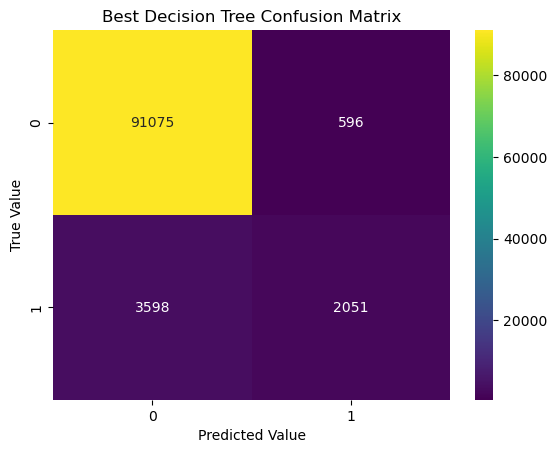

In [35]:
cf_matrix = confusion_matrix(y_bin_test, y_pred_tf)

sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='viridis')
plt.title('Best Decision Tree Confusion Matrix')
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.show()

tf-idf is more precise on the same custom tokenizer and log reg model

going from a precision of 71% to 77%

Let's try a weighed Log Reg

In [69]:
logistic_model_weighted =LogisticRegression(class_weight='balanced', max_iter=1000)
logistic_model_weighted.fit(tokens_tfidf_df,y_bin)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [70]:
y_pred_tf_weighted = logistic_model_weighted.predict(X_test_trans_tf)

print(f"Train set accuracy {logistic_model_weighted.score(X_transformed_tfidf,y_bin):.2f}%")
print(f"Test set accuracy {logistic_model_weighted.score(X_test_trans_tf,y_bin_test):.2f}%")
print(precision_score(y_bin_test, y_pred_tf_weighted))
print(recall_score(y_bin_test, y_pred_tf_weighted))
print(f1_score(y_bin_test, y_pred_tf_weighted))

Train set accuracy 0.88%
Test set accuracy 0.88%
0.2895616145415664
0.7670384138785625
0.42041430165429583


C:\Users\arman\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\arman\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


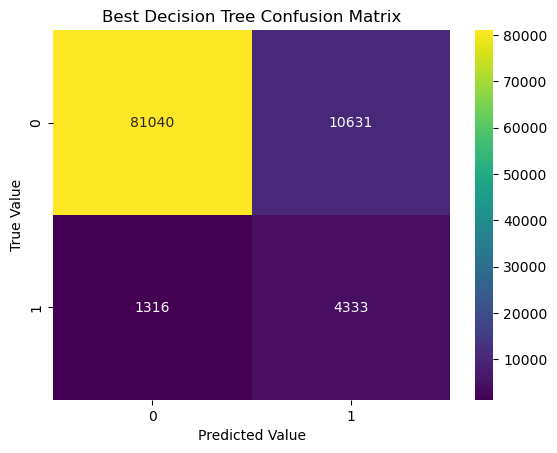

In [71]:
cf_matrix = confusion_matrix(y_bin_test, y_pred_tf_weighted)

sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='viridis')
plt.title('Best Decision Tree Confusion Matrix')
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.show()

Overall our tf-idf vectorizer yields the best results across all evaulation metrics, in addition to removing '\n', stopwords, and numbers from our tokens.

Running balanced class weights on this data does not respond well with a logistic regression, it performs worse than the natual occurance of true positives. Likely the model is overcorrecting and/or is no complex enough to find patterns given the extreme data class imbalance.

A Neural Network will likely capitalize on class balancing with sufficient complexity to track patterns.